In [ ]:
"""
@ Authors:

LE BORGNE Pierre-Alexis :https://www.kaggle.com/pierra

GUILLAUME Florian : https://www.kaggle.com/florianguillaume

In [ ]:
#Importing librairies

import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn

%matplotlib inline

In [ ]:
#pemanggilan data

data = pd.read_csv("/content/drive/MyDrive/Machine Leaning/creditcard.csv") #Read the dataset
df = pd.DataFrame(data) # Converting data to Panda DataFrame
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Deskripsi fitur statistik (Jumlah, Rata-rata, Varians, minimum, kuartil 1, kuartil 2, Kuartil 3 dan Maksimum)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


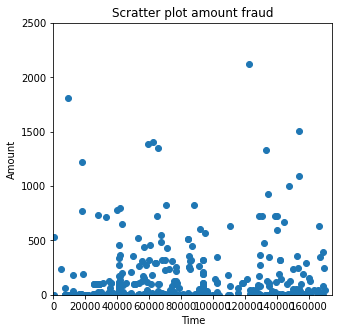

In [ ]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(5,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [ ]:
#Kami perhatikan, pertama-tama, waktu tidak memengaruhi frekuensi penipuan. Apalagi mayoritas penipuan dalam jumlah kecil. Di [6]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


In [ ]:
#Unbalanced data

number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')


There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


In [ ]:
print("The accuracy of the classifier then would be : "+ str((284315-492)/284315)+ " which is the number of good classification over the number of tuple to classify")

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


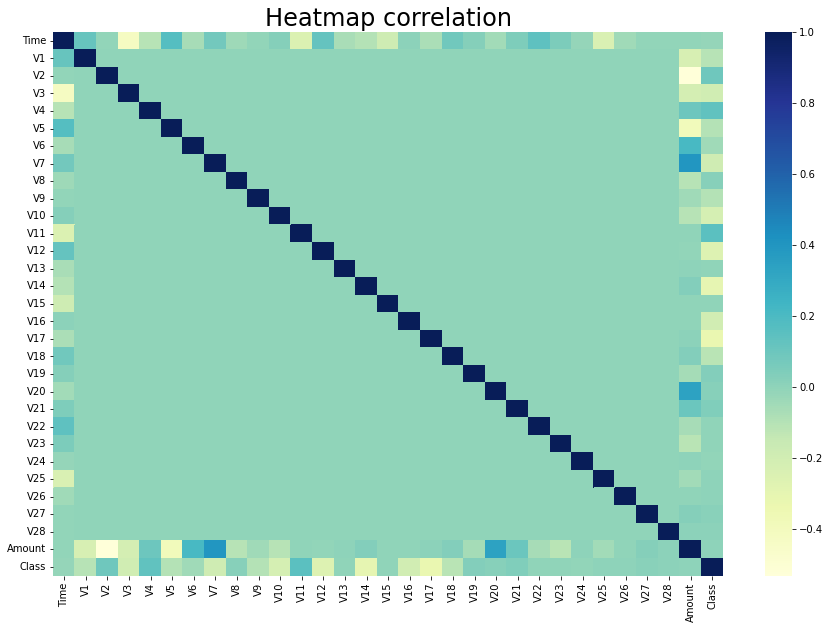

In [ ]:
#Untuk menjawab masalah ini kita bisa menggunakan prinsip oversampling atau prinsip undersampling Prinsip undersampling harus digunakan hanya 
#jika kita dapat yakin bahwa beberapa tupel yang dipilih (dalam hal ini non-penipuan) mewakili seluruh transaksi non-penipuan dari kumpulan data.

#Correlation of features
df_corr = df.corr()

plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [ ]:
"""
Seperti yang dapat kita perhatikan, sebagian besar fitur tidak berkorelasi satu sama lain. Ini menguatkan fakta bahwa PCA sebelumnya dilakukan pada data.

Apa yang umumnya dapat dilakukan pada dataset besar-besaran adalah pengurangan dimensi. Dengan memilih dimensi yang paling penting, 
ada kemungkinan untuk menjelaskan sebagian besar masalah, sehingga memperoleh banyak waktu sambil mencegah akurasi untuk turun terlalu banyak.

Namun dalam kasus ini mengingat fakta bahwa PCA sebelumnya dilakukan, jika pengurangan dimensi efektif maka PCA tidak dihitung dengan cara yang paling efektif. Cara lain untuk mengatakannya 
adalah bahwa tidak ada pengurangan dimensi yang harus dihitung pada kumpulan data di mana PCA dihitung dengan benar.

In [ ]:
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)

In [ ]:
#Data Selection

"""
OVERSAMPLING

Salah satu cara untuk melakukan oversampling adalah dengan mereplikasi tupel kelas yang kurang terwakili sampai kita mencapai proporsi yang benar antara kelas

Namun karena kami tidak memiliki waktu dan kesabaran yang tidak terbatas, kami akan menjalankan pengklasifikasi dengan data pelatihan yang kurang sampel 
(bagi mereka yang menggunakan prinsip undersampling jika hasilnya benar-benar buruk, jalankan kembali definisi kumpulan data pelatihan)

In [ ]:
#UNDERSAMPLING

# We seperate ours data in two groups : a train dataset and a test dataset

# First we build our train dataset
df_train_all = df[0:150000] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['Class'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds. 
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


In [ ]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [ ]:
############################## with all the test dataset to see if the model learn correctly ##################
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [ ]:
#Kemudian kami mendefinisikan set pelatihan dan pengujian setelah menerapkan pengurangan dimensi untuk menggambarkan fakta bahwa tidak ada yang akan diperoleh 
#karena PCA sebelumnya dihitung Dalam
X_train_rank = df_train[df_rank.index[1:11]] # We take the first ten ranked features
X_train_rank

,V17,V14,V12,V10,V16,V3,V7,V11,V4,V18
12261,-11.485328,-13.028717,-13.547486,-12.830657,-7.652662,-24.202142,-17.656788,9.442665,11.805469,-4.721370
58581,2.864020,-3.392224,-0.357499,-0.523427,0.621943,-1.690136,0.935140,2.784912,1.487398,1.559184
16780,-11.756256,-5.843528,-6.210941,-8.120962,-5.606597,-28.407424,-18.709479,4.419943,6.370895,-4.714947
141560,0.749286,0.250408,-0.160743,1.521987,-0.694083,0.073515,-0.599214,1.670432,-1.366495,-0.524659
56078,0.019015,-0.241545,0.518438,0.544613,-0.499849,1.648205,0.339785,0.325322,1.128357,-0.345809
...,...,...,...,...,...,...,...,...,...,...
95597,-4.186808,-4.857777,-3.701750,-4.320536,-2.801502,-3.018758,-0.509995,1.277202,3.289291,-1.648406
45203,0.635694,-11.583898,-5.849558,-4.077585,-1.461029,-4.946075,-0.184710,4.389214,6.456588,0.390150
143466,-0.535580,0.469725,0.388183,-0.126066,0.363372,1.659557,0.568485,1.380147,-0.095197,0.149435
73857,-12.822177,-10.309334,-9.225855,-8.122161,-7.787326,-6.850888,-6.545072,6.029033,5.174706,-4.367677


In [ ]:
X_train_rank = np.asarray(X_train_rank)
X_train_rank

array([[-11.48532779, -13.02871703, -13.5474859 , ...,   9.44266527,
         11.80546921,  -4.72136958],
       [  2.86402042,  -3.39222397,  -0.35749904, ...,   2.78491163,
          1.4873984 ,   1.55918446],
       [-11.75625561,  -5.84352838,  -6.21094112, ...,   4.41994346,
          6.37089535,  -4.71494676],
       ...,
       [ -0.53558021,   0.4697254 ,   0.38818253, ...,   1.38014719,
         -0.09519686,   0.14943458],
       [-12.822177  , -10.30933419,  -9.22585531, ...,   6.02903256,
          5.17470627,  -4.36767713],
       [-21.67398671, -14.10746426, -13.74295284, ...,   7.04773274,
          8.19961393,  -7.78404247]])

In [ ]:
############################## with all the test dataset to see if the model learn correctly ##################
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

In [ ]:
#Confusion Matrix

class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)


In [ ]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#Model Selection

classifier = svm.SVC(kernel='linear') # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)
classifier.fit(X_train, y_train) # Then we train our model, with our balanced data train.


SVC(kernel='linear')

In [ ]:
prediction_SVM_all = classifier.predict(X_test_all) #And finally, we predict our data test.
prediction_SVM_all

array([0, 0, 1, ..., 0, 0, 0])

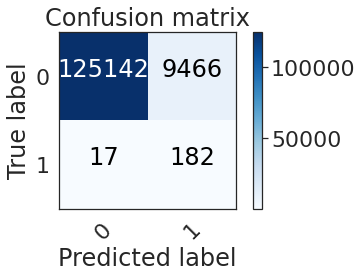

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [ ]:
"""
Dalam hal ini kami akan mencoba untuk meminimalkan jumlah kesalahan dalam hasil prediksi kami. Kesalahan ada pada anti-diagonal dari matriks konfusi. 
Tetapi kita dapat menyimpulkan bahwa kesalahan tentang penipuan yang sebenarnya jauh lebih buruk daripada kesalahan tentang transaksi non-penipuan.

Itulah mengapa menggunakan akurasi sebagai satu-satunya kriteria klasifikasi dapat dianggap tidak bijaksana. Selama bagian yang tersisa dari penelitian ini, 
kriteria kami akan mempertimbangkan presisi pada penipuan nyata 4 kali lebih penting daripada akurasi umum. Padahal hasil akhir yang diuji adalah akurasi.

In [ ]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9175892891057764


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 182 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.914572864321608
the accuracy is : 0.9296549882424503


In [ ]:
#Models Rank
#Ada kebutuhan untuk menghitung metode fit lagi, karena dimensi tupel yang diprediksi berubah dari 29 menjadi 10 karena pengurangan dimensi Dalam

classifier.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier.predict(X_test_all_rank) #And finally, we predict our data test.

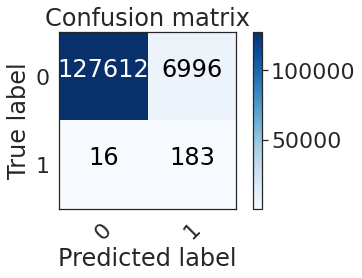

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9252753713451425


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 183 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9195979899497487
the accuracy is : 0.9479848969267175


Kita dapat melihat bahwa studi menggunakan data yang direduksi jauh dari relevan, yang berarti bahwa langkah terakhir dari PCA yang dihitung sebelumnya dapat dilakukan dengan cara yang lebih efisien. Memang salah satu pertanyaan utama yang kami miliki dengan PCA setelah kami menghitung arah komponen utama, adalah berapa banyak komponen ini yang akan kami simpan. Artinya beberapa dari 30 dimensi tersebut tidak terlalu membeda-bedakan kelas.